In [36]:
import pandas as pd
import scanpy as sc
import anndata as ad
import cstarpy
import os
import numpy as np
from cstarpy.separation import CellStateTransition

In [4]:
outdir='/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_publication'

In [10]:
neu_adata = ad.read_h5ad(os.path.join(outdir,'gbm_scvi_neurons.h5ad'))

In [11]:
neu_adata

AnnData object with n_obs × n_vars = 56716 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', '_scvi_batch', '_scvi_labels', 'leiden', 'Cellid', 'Tumor_Normal_annotation', 'solo', 'custom_annotation', 'Status'
    var: 'Gene', 'mt', 'n_cells_by_counts-SF11082', 'mean_counts-SF11082', 'pct_dropout_by_counts-SF11082', 'total_counts-SF11082', 'n_cells_by_counts-SF11488', 'mean_counts-SF11488', 'pct_dropout_by_counts-SF11488', 'total_counts-SF11488', 'n_cells_by_counts-SF11916', 'mean_counts-SF11916', 'pct_dropout_by_counts-SF11916', 'total_counts-SF11916', 'n_cells_by_counts-SF12382', 'mean_counts-SF12382', 'pct_dropout_by_counts-SF12382', 'total_counts-SF12382', 'n_cells_by_counts-SF2777', 'mean_counts-SF2777', 'pct_dropout_by_counts-SF2777', 'total_counts-SF2777', 'n_cells_by_counts-SF2979', 'mean_counts-SF2979', 'pct_dropout_by_counts-SF2979', 'total_counts-SF2979', 'n_cells_by_counts-SF2990', 'mean_counts-SF2990', 'pct_dropout

In [7]:
directory = '/home/jing/Phd_project/project_GBM/gbm_DATA/gbm_DATA_GSE174554/gbm_DATA_scRNA_atlas'
os.chdir(directory)

In [8]:
names_list=['GSM5319518_SF2777','GSM5319548_SF2979','GSM5319519_SF2990',
                'GSM5319549_SF3073','GSM5319520_SF3076','GSM5319550_SF3243',
                'GSM5319521_SF3391','GSM5319551_SF3448','GSM5319511_SF11916',
                'GSM5319543_SF12382','GSM5319506_SF11082','GSM5319562_SF11488',
                'GSM5319530_SF9358','GSM5319568_SF9962','GSM5319559_SF9798','GSM5319532_SF9494']

In [22]:
adata_list = []

# Loop over each sample and read in the AnnData object
for name in names_list:

    mtx =f"{name}_matrix.mtx.gz"
    adata = sc.read_mtx(mtx)
    cells=pd.read_csv(f'{name}_barcodes.tsv.gz',header=None)
    features=pd.read_csv(f'{name}_features.tsv.gz',header=None,sep='\t')
    adata= adata.T
    #check the columns first to make sure they are the ones you need 
    adata.obs['CellID']= cells[0].tolist()
    adata.obs.index = adata.obs['CellID']
    adata.var['Gene']= features[0].tolist()
    adata.var.index= adata.var['Gene']
    adata.var_names_make_unique() 
    adata.var['mt'] =adata.var_names.str.startswith('MT-')


    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.calculate_qc_metrics(adata,qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    adata= adata[adata.obs.n_genes_by_counts <6000, :]
    adata= adata[adata.obs.pct_counts_mt< 5, :].copy()


    adata.obs['source'] = name[11:]
    adata.layers["counts"] = adata.X.copy()    
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.raw = adata  # keep full dimension safe
    adata_list.append(adata)

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


In [25]:
batch_names = [adata.obs['source'].iloc[0] for adata in adata_list]
adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)                                  

/tmp/ipykernel_10435/1379501109.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)


In [26]:
adata.obs

,CellID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source
CellID,,,,,,,
AAACCCAAGGGATCAC-1-SF2777,AAACCCAAGGGATCAC-1,468,468,579.0,9.0,1.554404,SF2777
AAACCCAGTCGATTTG-1-SF2777,AAACCCAGTCGATTTG-1,311,311,402.0,4.0,0.995025,SF2777
AAACCCAGTCGTCAGC-1-SF2777,AAACCCAGTCGTCAGC-1,864,864,1518.0,3.0,0.197628,SF2777
AAACCCAGTTGTAAAG-1-SF2777,AAACCCAGTTGTAAAG-1,632,632,891.0,12.0,1.346801,SF2777
AAACCCATCTATCGGA-1-SF2777,AAACCCATCTATCGGA-1,849,849,1338.0,43.0,3.213752,SF2777
...,...,...,...,...,...,...,...
TTTGGTTTCATTATCC-1-SF9494,TTTGGTTTCATTATCC-1,2027,2027,4502.0,0.0,0.000000,SF9494
TTTGGTTTCCCTCGTA-1-SF9494,TTTGGTTTCCCTCGTA-1,1972,1972,4071.0,0.0,0.000000,SF9494
TTTGTTGTCAGACAAA-1-SF9494,TTTGTTGTCAGACAAA-1,2340,2340,5272.0,0.0,0.000000,SF9494


In [13]:
neu_adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source,_scvi_batch,_scvi_labels,leiden,Cellid,Tumor_Normal_annotation,solo,custom_annotation,Status
CellID,,,,,,,,,,,,,,
AAACCCAAGGGATCAC-1-SF2777,468,468,579.0,9.0,1.554404,SF2777,0,0,0,AAACCCAAGGGATCAC-1,Tumor,singlet,Tumor,Recurrent
AAACCCAGTCGATTTG-1-SF2777,311,311,402.0,4.0,0.995025,SF2777,0,0,6,AAACCCAGTCGATTTG-1,Tumor,singlet,Tumor,Recurrent
AAACCCAGTCGTCAGC-1-SF2777,864,864,1518.0,3.0,0.197628,SF2777,0,0,6,AAACCCAGTCGTCAGC-1,Tumor,singlet,Tumor,Recurrent
AAACCCAGTTGTAAAG-1-SF2777,632,632,891.0,12.0,1.346801,SF2777,0,0,0,AAACCCAGTTGTAAAG-1,Tumor,singlet,Tumor,Recurrent
AAACCCATCTATCGGA-1-SF2777,849,849,1338.0,43.0,3.213752,SF2777,0,0,0,AAACCCATCTATCGGA-1,Tumor,singlet,Tumor,Recurrent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCATTATCC-1-SF9494,2027,2027,4502.0,0.0,0.000000,SF9494,15,0,2,TTTGGTTTCATTATCC-1,Normal,singlet,Oligodendrocytes,Recurrent
TTTGGTTTCCCTCGTA-1-SF9494,1972,1972,4071.0,0.0,0.000000,SF9494,15,0,2,TTTGGTTTCCCTCGTA-1,Normal,singlet,Oligodendrocytes,Recurrent
TTTGTTGTCAGACAAA-1-SF9494,2340,2340,5272.0,0.0,0.000000,SF9494,15,0,13,TTTGTTGTCAGACAAA-1,Tumor,singlet,Tumor,Recurrent


In [27]:
pmr_tumor= adata[neu_adata.obs[
    (neu_adata.obs['Tumor_Normal_annotation'] == 'Tumor') & 
    (neu_adata.obs['Status'] == 'Primary')
].index].copy()


In [32]:
pmr_tumor

AnnData object with n_obs × n_vars = 19553 × 33694
    obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source'
    var: 'Gene', 'mt', 'n_cells_by_counts-SF11082', 'mean_counts-SF11082', 'pct_dropout_by_counts-SF11082', 'total_counts-SF11082', 'n_cells_by_counts-SF11488', 'mean_counts-SF11488', 'pct_dropout_by_counts-SF11488', 'total_counts-SF11488', 'n_cells_by_counts-SF11916', 'mean_counts-SF11916', 'pct_dropout_by_counts-SF11916', 'total_counts-SF11916', 'n_cells_by_counts-SF12382', 'mean_counts-SF12382', 'pct_dropout_by_counts-SF12382', 'total_counts-SF12382', 'n_cells_by_counts-SF2777', 'mean_counts-SF2777', 'pct_dropout_by_counts-SF2777', 'total_counts-SF2777', 'n_cells_by_counts-SF2979', 'mean_counts-SF2979', 'pct_dropout_by_counts-SF2979', 'total_counts-SF2979', 'n_cells_by_counts-SF2990', 'mean_counts-SF2990', 'pct_dropout_by_counts-SF2990', 'total_counts-SF2990', 'n_cells_by_counts-SF3073', 'mean_counts-SF3073', 'pct_dropout_

In [ ]:
pmr_tumor_df = pd.DataFrame(
    pmr_tumor.layers['counts'].toarray(),  # Convert sparse matrix to dense array
    index=pmr_tumor.obs.index, 
    columns=pmr_tumor.var.index
)

In [33]:
rct_tumor= adata[neu_adata.obs[
    (neu_adata.obs['Tumor_Normal_annotation'] == 'Tumor') & 
    (neu_adata.obs['Status'] == 'Recurrent')
].index].copy()


In [34]:
rct_tumor

AnnData object with n_obs × n_vars = 19419 × 33694
    obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source'
    var: 'Gene', 'mt', 'n_cells_by_counts-SF11082', 'mean_counts-SF11082', 'pct_dropout_by_counts-SF11082', 'total_counts-SF11082', 'n_cells_by_counts-SF11488', 'mean_counts-SF11488', 'pct_dropout_by_counts-SF11488', 'total_counts-SF11488', 'n_cells_by_counts-SF11916', 'mean_counts-SF11916', 'pct_dropout_by_counts-SF11916', 'total_counts-SF11916', 'n_cells_by_counts-SF12382', 'mean_counts-SF12382', 'pct_dropout_by_counts-SF12382', 'total_counts-SF12382', 'n_cells_by_counts-SF2777', 'mean_counts-SF2777', 'pct_dropout_by_counts-SF2777', 'total_counts-SF2777', 'n_cells_by_counts-SF2979', 'mean_counts-SF2979', 'pct_dropout_by_counts-SF2979', 'total_counts-SF2979', 'n_cells_by_counts-SF2990', 'mean_counts-SF2990', 'pct_dropout_by_counts-SF2990', 'total_counts-SF2990', 'n_cells_by_counts-SF3073', 'mean_counts-SF3073', 'pct_dropout_

In [35]:
rct_tumor_df = pd.DataFrame(
    rct_tumor.layers['counts'].toarray(),  # Convert sparse matrix to dense array
    index=rct_tumor.obs.index, 
    columns=rct_tumor.var.index
)

### SVM

In [ ]:
cst = CellStateTransition('p', pmr_tumor_df, rct_tumor_df)

In [ ]:
dpd_scores = cst.get_dpd()

norm_s_df = pd.DataFrame(np.stack([cst.n, cst.s], axis=1), index=cst.svm_input.data.columns, columns=["n", "s"])

print(cst.h)

In [ ]:

dpd_scores.to_pickle(os.path.join(outdir, 'dpd_scvi_p_r_high_tumor.pkl'))

norm_s_df.to_pickle(os.path.join(outdir, 'stv_scvi_p_r_high_tumor.pkl'))

In [ ]:
#Lincs genes

In [37]:
lm_df=pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_Scripts/perturbations/01_outputs_2020/L1000_Data_norm_data.csv',index_col=0)
display(lm_df)

,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B12,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,...,MOAR010_BC3C_24H:K09,MOAR010_BC3C_24H:L19,MOAR010_BC3C_24H:L20,MOAR010_BC3C_24H:L21,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:J10
AARS,-0.496854,0.288446,0.189747,-0.016454,0.080746,0.282346,0.326246,0.244946,0.303046,0.387546,...,-0.217618,-0.074268,-0.012317,-0.004018,0.215100,-0.178100,-0.007000,0.024000,0.007400,0.031399
ABCB6,-0.658596,-0.142196,-0.075397,-0.383796,-0.199996,-0.074197,0.108804,0.055204,-0.399196,-0.227496,...,0.202852,-0.003798,-0.661323,0.326502,0.127850,0.081150,-0.026850,-0.152851,0.122550,-0.029350
ABCC5,-0.080204,0.231996,-0.329354,-0.225204,0.278446,0.034696,0.396596,0.288746,-0.255704,-0.254154,...,0.011493,0.187043,-0.051357,0.358943,0.197500,0.119350,0.212450,-0.177250,0.138650,0.568950
ABCF1,0.202535,0.602335,0.403335,0.313134,-0.083265,-0.056365,-0.387216,0.104534,0.097235,0.540634,...,-0.458439,1.132361,-0.555990,-0.556689,-0.036825,-0.080325,0.059175,0.307175,0.580075,0.322875
ABCF3,-0.520919,-0.192819,0.001032,-0.096419,0.210881,-0.731118,0.095381,0.049931,0.313481,-0.078018,...,0.201432,-0.028568,0.447982,0.610582,-0.378251,0.003950,0.127300,-0.197401,-0.128351,-0.012850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF395,1.796254,1.773154,0.668354,0.825354,0.350654,0.205954,-0.998346,-0.458247,0.235354,0.230653,...,-0.285181,-1.188080,-0.050680,-1.175880,0.300250,-0.265350,-0.380850,-0.330950,-1.844650,-0.612350
ZNF451,-0.244519,0.116732,0.058081,-0.178169,-0.080619,-0.139119,0.064681,-0.237719,-0.083019,-0.272119,...,0.085807,0.107632,-0.083718,0.105732,-0.324500,0.080550,-0.114950,-0.337650,-0.024950,-0.151550
ZNF586,0.097627,0.061027,-0.337573,0.098427,-0.338173,0.017627,-0.197423,-0.155173,-0.078473,-0.300473,...,0.056085,-0.005365,-0.123664,-0.191564,-0.304650,-0.259400,0.163600,-0.428700,-0.069200,0.073700
ZNF589,0.608573,0.106123,-0.014126,-0.003677,-0.123477,-0.243377,0.044623,0.092123,-0.021477,0.201823,...,-0.200241,-0.027441,0.007359,-0.072891,-0.315500,-0.013900,-0.035050,1.836400,-0.223300,-0.343400


In [39]:
common_genes = pmr_tumor_df.columns.intersection(lm_df.index)

In [41]:
rct_tumor_lincs = rct_tumor_df[common_genes]
rct_tumor_lincs.shape

(19419, 958)

In [42]:
pmr_tumor_lincs = pmr_tumor_df[common_genes]
pmr_tumor_lincs.shape

(19553, 958)

In [47]:
cst_lincs = CellStateTransition('ptumor_rtumor', pmr_tumor_lincs, rct_tumor_lincs)

In [48]:
dpd_scores_lincs = cst_lincs.get_dpd()

norm_s_lincs = pd.DataFrame(np.stack([cst_lincs.n, cst_lincs.s], axis=1), index=cst_lincs.svm_input.data.columns, columns=["n", "s"])

print(cst_lincs.h)

-0.22784901382065992


In [50]:
dpd_scores_lincs.to_pickle(os.path.join(outdir, 'dpd_scvi_p_r_lincs_tumor.pkl'))

norm_s_lincs.to_pickle(os.path.join(outdir, 'stv_scvi_p_r_lincs_tumor.pkl'))

### Visualization

In [49]:
dpd_scores_lincs

,DPD_ptumor_rtumor
CellID,
AAACCCATCCACTTTA-1-SF2990,-1.557837
AAACGCTAGATAGGGA-1-SF2990,-0.767735
AAAGAACTCCCGTTCA-1-SF2990,-1.561610
AAAGGATGTTGCACGC-1-SF2990,-1.334120
AAAGGATTCGACCCAG-1-SF2990,-1.156094
...,...
TTTCGATCACTCTGCT-1-SF9494,1.260537
TTTCGATGTGTCCTAA-1-SF9494,0.955390
TTTGACTGTTATGTGC-1-SF9494,0.602880


In [51]:
anno =neu_adata.obs.reset_index()

In [52]:
#Adding annotations
dpd_scores_lincs.reset_index(inplace=True)
dpd_scores_lincs_dim_annotated = dpd_scores_lincs.merge(anno[['CellID','Tumor_Normal_annotation', 'custom_annotation',
       'Status']],on = 'CellID',how='left')

In [53]:
dpd_scores_lincs_dim_annotated

,CellID,DPD_ptumor_rtumor,Tumor_Normal_annotation,custom_annotation,Status
0,AAACCCATCCACTTTA-1-SF2990,-1.557837,Tumor,Tumor,Primary
1,AAACGCTAGATAGGGA-1-SF2990,-0.767735,Tumor,Tumor,Primary
2,AAAGAACTCCCGTTCA-1-SF2990,-1.561610,Tumor,Tumor,Primary
3,AAAGGATGTTGCACGC-1-SF2990,-1.334120,Tumor,Tumor,Primary
4,AAAGGATTCGACCCAG-1-SF2990,-1.156094,Tumor,Tumor,Primary
...,...,...,...,...,...
38967,TTTCGATCACTCTGCT-1-SF9494,1.260537,Tumor,Tumor,Recurrent
38968,TTTCGATGTGTCCTAA-1-SF9494,0.955390,Tumor,Tumor,Recurrent
38969,TTTGACTGTTATGTGC-1-SF9494,0.602880,Tumor,Tumor,Recurrent
38970,TTTGTTGTCAGACAAA-1-SF9494,0.452686,Tumor,Tumor,Recurrent


In [54]:
dpd_scores_lincs_dim_annotated['zeros']= 0

In [55]:
import seaborn as sns

<Axes: xlabel='DPD_ptumor_rtumor', ylabel='zeros'>

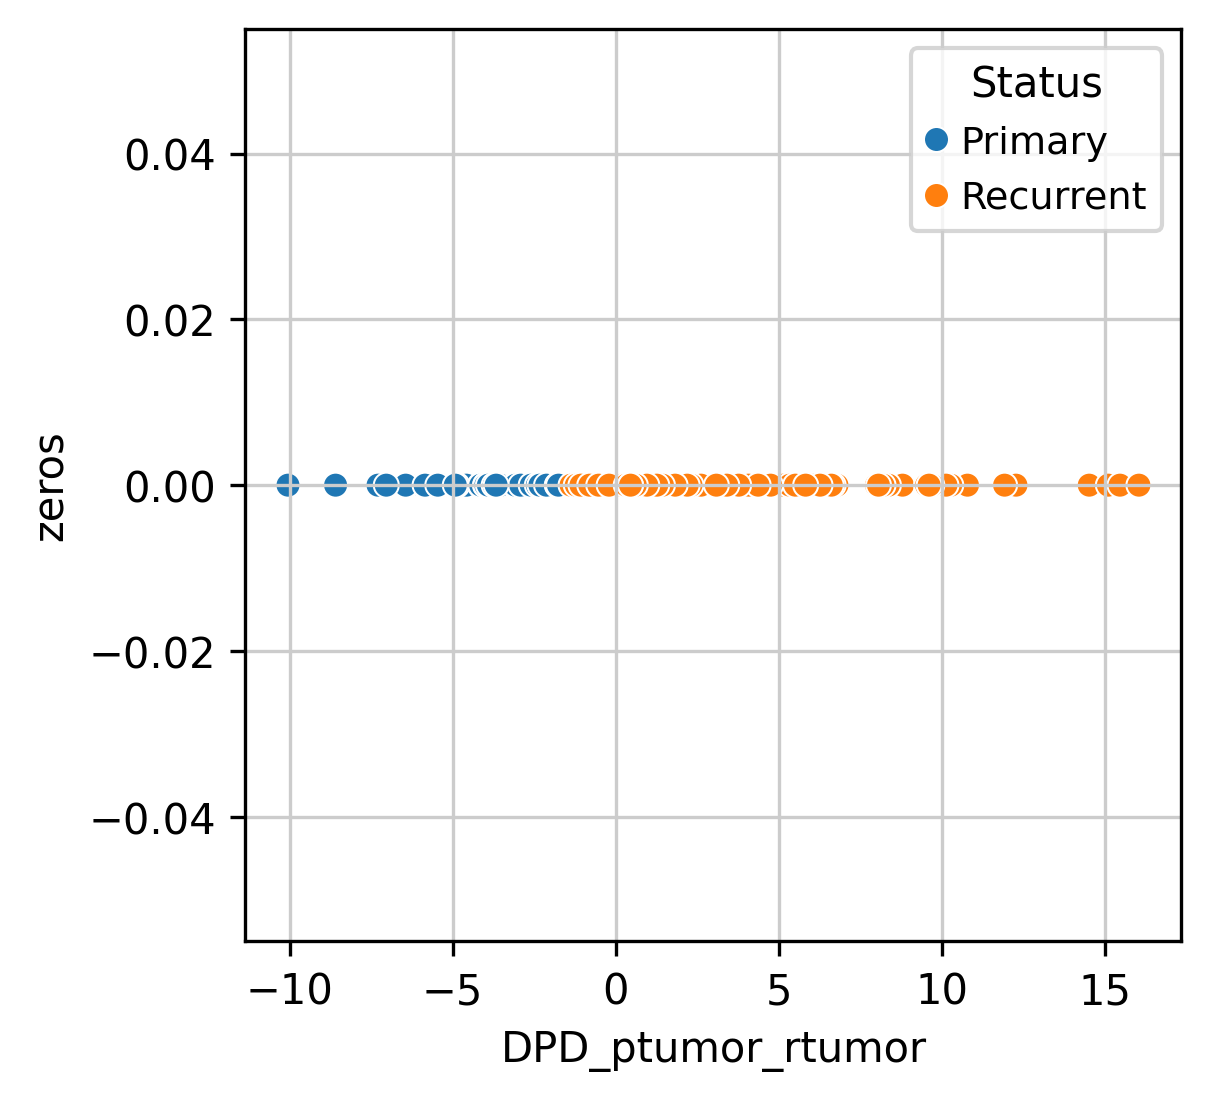

In [56]:
sns.scatterplot(x='DPD_ptumor_rtumor',y='zeros',data=dpd_scores_lincs_dim_annotated,hue='Status')

<Axes: >

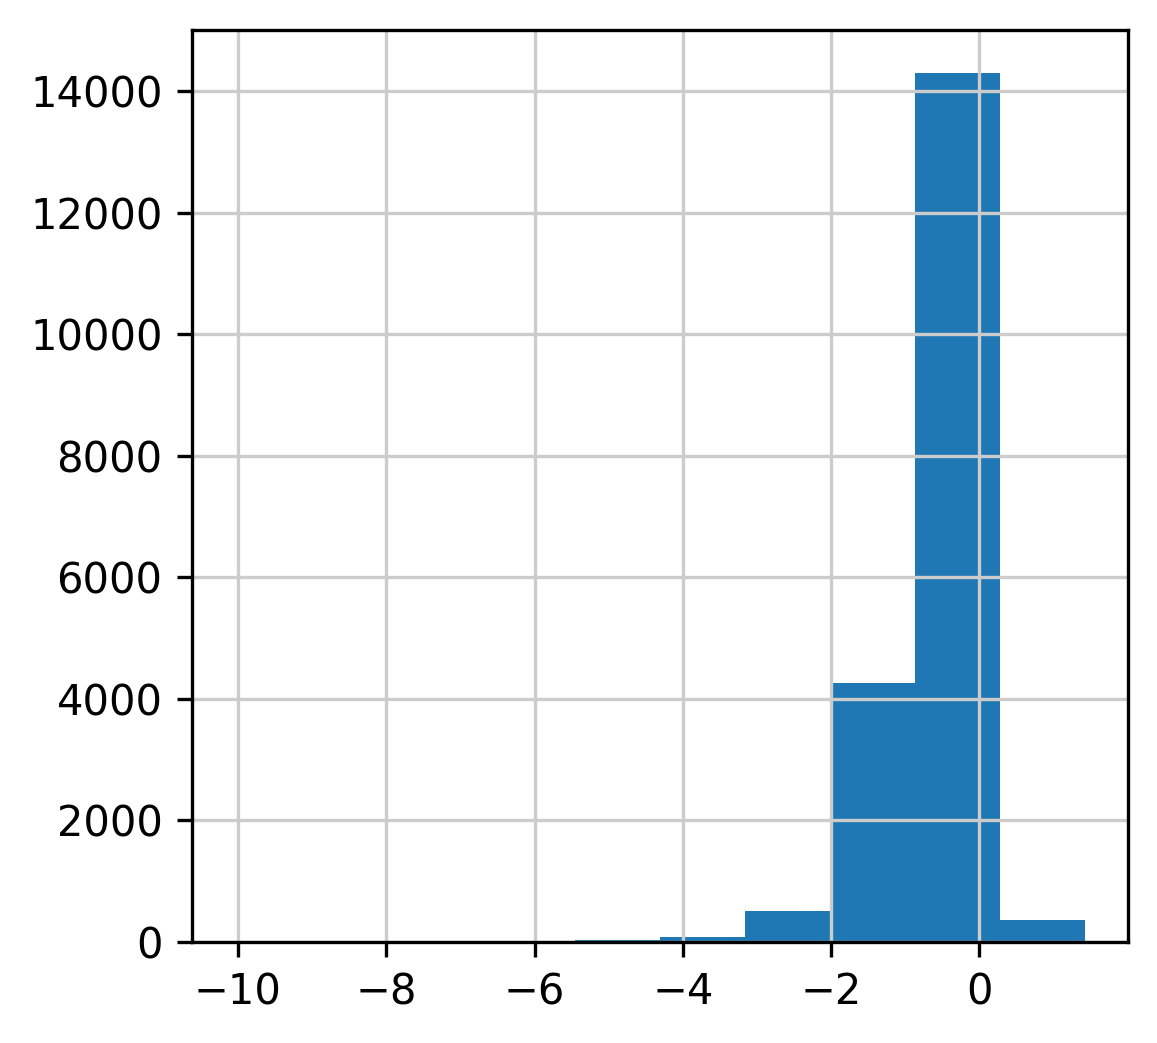

In [57]:
dpd_scores_lincs_dim_annotated[dpd_scores_lincs_dim_annotated['Status'] == 'Primary']['DPD_ptumor_rtumor'].hist()

<Axes: >

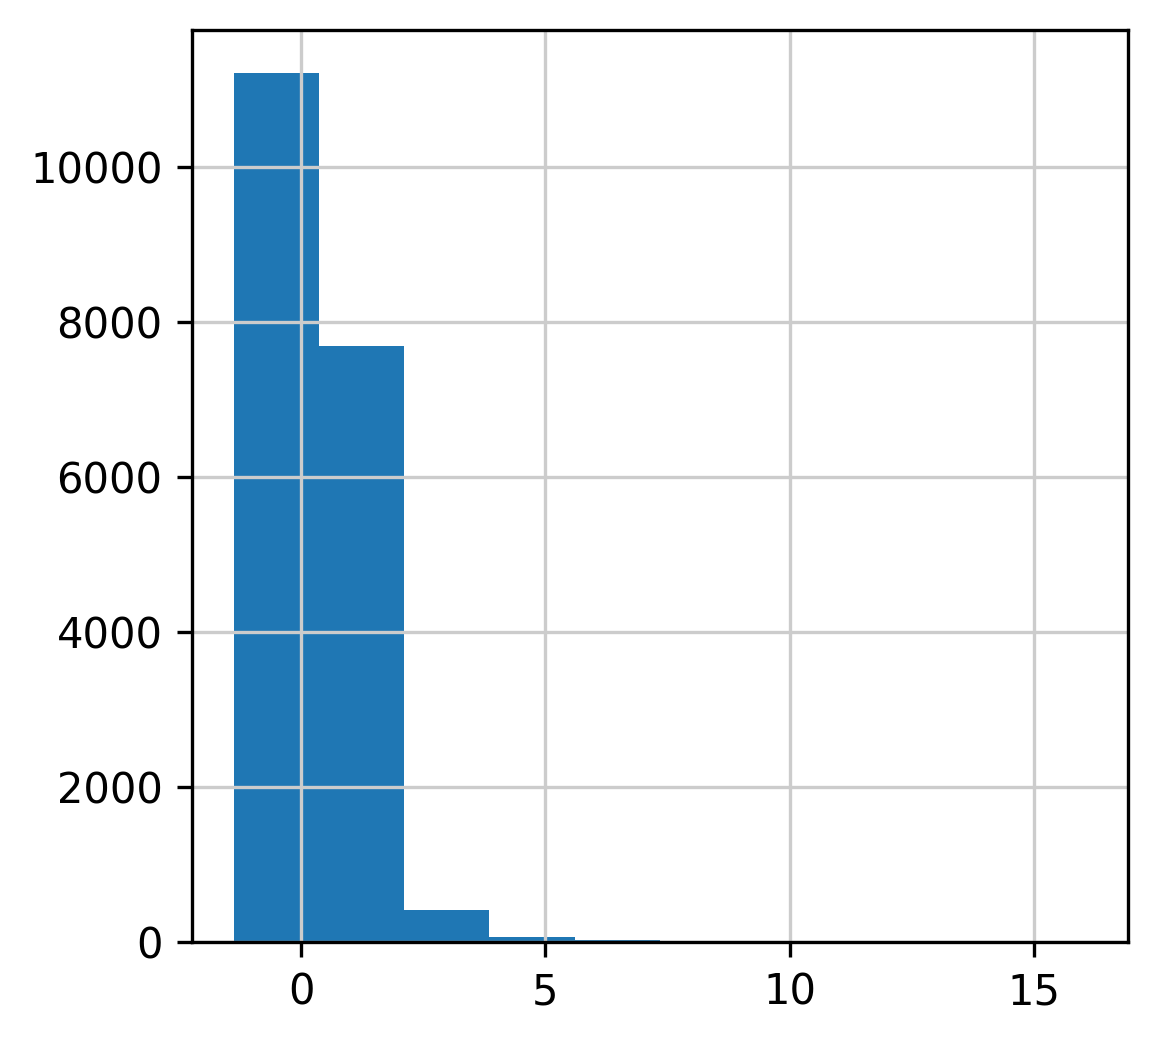

In [58]:
dpd_scores_lincs_dim_annotated[dpd_scores_lincs_dim_annotated['Status'] == 'Recurrent']['DPD_ptumor_rtumor'].hist()